# Name:- Parshwa Shah
# Experiment No.:- 5
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

# Kaggle:- https://www.kaggle.com/parshwa52

<h2>Aim:- To measure the performance of the model </h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h3> Import the training dataset </h3>

In [2]:
dataset = pd.read_csv('./train.csv')

<h3> Import the testing dataset </h3>

In [3]:

testdata = pd.read_csv('./test.csv')

In [4]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<h3> Check the dataset columns </h3>

In [5]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3> Check the columns with null values </h3>

In [6]:
for col in dataset.columns:
    if(dataset[col].isna().sum()>0):
        #print("Column=",col)
        print(f"Null values in {col} are {dataset[col].isna().sum()}")

Null values in LotFrontage are 259
Null values in Alley are 1369
Null values in MasVnrType are 8
Null values in MasVnrArea are 8
Null values in BsmtQual are 37
Null values in BsmtCond are 37
Null values in BsmtExposure are 38
Null values in BsmtFinType1 are 37
Null values in BsmtFinType2 are 38
Null values in Electrical are 1
Null values in FireplaceQu are 690
Null values in GarageType are 81
Null values in GarageYrBlt are 81
Null values in GarageFinish are 81
Null values in GarageQual are 81
Null values in GarageCond are 81
Null values in PoolQC are 1453
Null values in Fence are 1179
Null values in MiscFeature are 1406


<h3> Check the total no. of rows </h3>

In [7]:
totalrows=len(dataset)


In [8]:
totalrows

1460

<h3> Check data type value counts </h3>

In [9]:
dataset.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

<h3> Check for categorical and numerical columns in training data </h3>

In [10]:
cat_columns=[]
num_columns=[]
for col in dataset.columns.values:
    if dataset[col].dtype=='object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(len(cat_columns)," Categorical Columns are \n",cat_columns,'\n')
print(len(num_columns),"Numeric columns are \n",num_columns)

cat_data=dataset[cat_columns]
num_data=dataset[num_columns]

43  Categorical Columns are 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

38 Numeric columns are 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', '

<h3> Remove numerical columns whose Nan values > 40% and replace columns rest with median values in train data</h3>

In [11]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",num_data.shape)
for col in num_data.columns.values:
    if (pd.isna(num_data[col]).sum())>0:
        if pd.isna(num_data[col]).sum() > (40/100*len(num_data)):
            print(col,"removed")
            num_data=num_data.drop([col], axis=1)
        else:
            num_data[col]=num_data[col].fillna(num_data[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",num_data.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (1460, 38)
Data Size After Numerical NAN Column(>40%) Removal : (1460, 38)


<h3> Check for categorical and numerical columns in test data </h3>

In [12]:
#remove columns which have null values > 40%
test_cat_columns=[]
test_num_columns=[]
for col in testdata.columns.values:
    if testdata[col].dtype=='object':
        test_cat_columns.append(col)
    else:
        test_num_columns.append(col)
print(len(test_cat_columns)," Categorical Columns are \n",test_cat_columns,'\n')
print(len(test_num_columns),"Numeric columns are \n",test_num_columns)

test_cat_data=testdata[test_cat_columns]
test_num_data=testdata[test_num_columns]

43  Categorical Columns are 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

37 Numeric columns are 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', '

<h3> Check for null values in test data </h3>

In [13]:
test_num_data.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

<h3> Remove numerical columns whose Nan values > 40% and replace columns rest with median values in test data</h3>

In [14]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",test_num_data.shape)
for col in test_num_data.columns.values:
    if (pd.isna(test_num_data[col]).sum())>0:
        if pd.isna(test_num_data[col]).sum() > (40/100*len(test_num_data)):
            print(col,"removed")
            test_num_data=test_num_data.drop([col], axis=1)
        else:
            test_num_data[col]=test_num_data[col].fillna(test_num_data[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",test_num_data.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (1459, 37)
Data Size After Numerical NAN Column(>40%) Removal : (1459, 37)


In [15]:
test_num_data.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

<h3> Remove categorical columns whose Nan values > 40% and replace columns rest with mode values in test data</h3>

In [16]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",test_cat_data.shape)
for col in test_cat_data.columns.values:
    if (pd.isna(test_cat_data[col]).sum())>0:
        if pd.isna(test_cat_data[col]).sum() > (40/100*len(test_cat_data)):
            print(col,"removed")
            test_cat_data=test_cat_data.drop([col], axis=1)
        else:
            test_cat_data[col]=test_cat_data[col].fillna(test_cat_data[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",test_cat_data.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (1459, 43)
Alley removed
FireplaceQu removed
PoolQC removed
Fence removed
MiscFeature removed
Data Size After Categorical NAN Column(>40%) Removal : (1459, 38)


In [17]:
test_cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

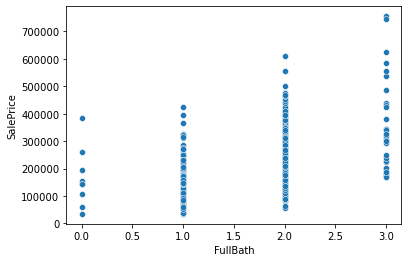

In [58]:
import seaborn as sns
sns.scatterplot(x="FullBath",
                    y="SalePrice",
                    data=num_data)


<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

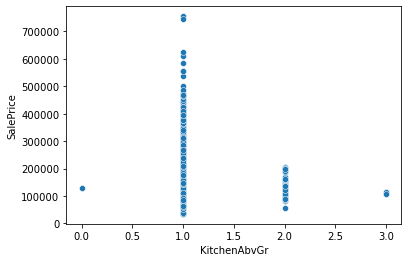

In [65]:
import seaborn as sns
sns.scatterplot(x="KitchenAbvGr",
                    y="SalePrice",
                    data=num_data)


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

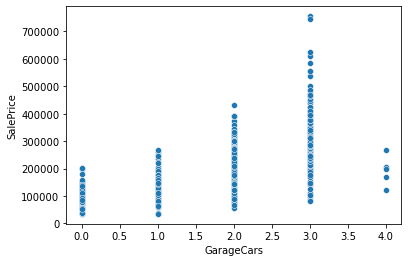

In [66]:
import seaborn as sns
sns.scatterplot(x="GarageCars",
                    y="SalePrice",
                    data=num_data)



    Inference: 
    1) More bathroom size, more is SalePrice
    2) KitchenAbvGr is 1, then more is SalePrice
    3) GarageCars more than 2, more is SalePrice

<h3> Create a baseline model using numerical columns of train data</h3>

In [18]:
y = num_data['SalePrice']
X = num_data.drop(['SalePrice'],axis=1)

In [19]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [20]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<h3> Fit Linear Regression model as baseline model and note R2 score 0.81</h3>

In [21]:
from sklearn.linear_model import LinearRegression
basereg = LinearRegression().fit(X, y)
baseypred = basereg.predict(test_num_data)
basereg.score(X, y)

0.8131858955487713

Referring Regression ROC AUC Score from:
https://towardsdatascience.com/how-to-calculate-roc-auc-score-for-regression-models-c0be4fdf76bb

In [22]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 10):
  """
  Computes Regression-ROC-AUC-score.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  y_pred: array-like of shape (n_samples,). Target scores.
  num_rounds: int or string. If integer, number of random pairs of observations. 
              If string, 'exact', all possible pairs of observations will be evaluated.
  
  Returns:
  -------
  rroc: float. Regression-ROC-AUC-score.
  """
  
  import numpy as np
    
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  num_pairs = 0
  num_same_sign = 0
  
  for i, j in _yield_pairs(y_true, num_rounds):
    diff_true = y_true[i] - y_true[j]
    diff_score = y_pred[i] - y_pred[j]
    if diff_true * diff_score > 0:
      num_same_sign += 1
    elif diff_score == 0:
      num_same_sign += .5
    num_pairs += 1
      
  return num_same_sign / num_pairs


def _yield_pairs(y_true, num_rounds):
  """
  Returns pairs of valid indices. Indices must belong to observations having different values.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  num_rounds: int or string. If integer, number of random pairs of observations to return. 
              If string, 'exact', all possible pairs of observations will be returned.
  
  Yields:
  -------
  i, j: tuple of int of shape (2,). Indices referred to a pair of samples.
  
  """
  import numpy as np
  
  if num_rounds == 'exact':
    for i in range(len(y_true)):
      for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
        yield i, j     
  else:
    for r in range(num_rounds):
      i = np.random.choice(range(len(y_true)))
      j = np.random.choice(np.where(y_true != y_true[i])[0])
      yield i, j

In [23]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score=",regression_roc_auc_score(y.to_numpy(),baseypred,10))

ROC AUC Score= 0.3


<h3> Fit Random Forest Regression model as baseline model and note R2 score 0.70</h3>

In [24]:
#baseline model on numerical data
from sklearn.ensemble import RandomForestRegressor
baserf = RandomForestRegressor(max_depth=2, random_state=0)
baserf.fit(X, y)
baserf.score(X,y)

0.7014494620244635

<h3> Remove categorical columns whose Nan values > 40% and replace columns rest with mode values in train data</h3>

In [25]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",cat_data.shape)
for col in cat_data.columns.values:
    if (pd.isna(cat_data[col]).sum())>0:
        if pd.isna(cat_data[col]).sum() > (40/100*len(cat_data)):
            print(col,"removed")
            cat_data=cat_data.drop([col], axis=1)
        else:
            cat_data[col]=cat_data[col].fillna(cat_data[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",cat_data.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (1460, 43)
Alley removed
FireplaceQu removed
PoolQC removed
Fence removed
MiscFeature removed
Data Size After Categorical NAN Column(>40%) Removal : (1460, 38)


<h3> Check null values in numeric and categorical data</h3>

In [26]:
num_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [27]:
num_data.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [28]:
cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [29]:
cat_data.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

<h3> Remove unnecessary columns from numeric data in train set</h3>

In [30]:
num_data=num_data.drop(['Id'], axis = 1)

In [31]:
num_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


<h3> Derive newness column from yrsold and yearremodadd columns</h3>

In [32]:
num_data['newness'] = num_data['YrSold'] - num_data['YearRemodAdd']

In [33]:
num_data


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,newness
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,5
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,31
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,6
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,36
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,40,0,0,0,0,0,8,2007,175000,7
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,0,2,2010,210000,22
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,60,0,0,0,0,2500,5,2010,266500,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,112,0,0,0,0,4,2010,142125,14


<h3> Remove year based columns from train data</h3>

In [34]:
num_data=num_data.drop(['YearBuilt','YearRemodAdd','YrSold'], axis = 1)

In [35]:
num_data


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,newness
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,208500,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,181500,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,223500,6
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,140000,36
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,0,40,0,0,0,0,0,8,175000,7
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,349,0,0,0,0,0,0,2,210000,22
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,0,60,0,0,0,0,2500,5,266500,4
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,366,0,112,0,0,0,0,4,142125,14


<h3> Label encode categorical data in train set</h3>

In [36]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in cat_data.columns:
    label_encoder.fit(cat_data[col])
    cat_data[col]= label_encoder.transform(cat_data[col])
    test_cat_data[col] = label_encoder.transform(test_cat_data[col])

<h3> Create final train data containing numeric and categorical data</h3>

In [37]:
finaltraindata=pd.concat([num_data,cat_data],axis=1)
finaltraindata

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,0,2,6,1,2,4,4,2,8,4


<h3> Keep train data ready for model</h3>

In [38]:
yfinal = finaltraindata['SalePrice']
Xfinal = finaltraindata.drop(['SalePrice'],axis=1)

In [39]:
Xfinal

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,0,2,6,1,2,4,4,2,8,4


In [40]:
yfinal

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<h3> Check test numeric and categorical data</h3>

In [41]:
test_num_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [42]:
test_cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,4,3,6,1,2,4,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,4,2,6,1,2,4,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,4,3,6,1,0,4,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,4,2,6,1,0,4,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,4,3,6,1,2,4,4,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,4,3,6,4,2,4,4,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,4,3,6,5,2,4,4,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,4,3,6,1,2,4,4,2,8,4


<h3> Apply same preprocessing on test data as train data</h3>

In [43]:
testid = test_num_data['Id']
test_num_data=test_num_data.drop(['Id'], axis = 1)

In [44]:
testid

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [45]:
test_num_data['newness'] = test_num_data['YrSold'] - test_num_data['YearRemodAdd']

In [46]:
test_num_data=test_num_data.drop(['YearBuilt','YearRemodAdd','YrSold'], axis = 1)

In [47]:
finaltestdata=pd.concat([test_num_data,test_cat_data],axis=1)
finaltestdata

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,4,3,6,1,2,4,4,2,8,4
1,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,4,2,6,1,2,4,4,2,8,4
2,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,4,3,6,1,0,4,4,2,8,4
3,60,78.0,9978,6,6,20.0,602.0,0.0,324.0,926.0,...,4,2,6,1,0,4,4,2,8,4
4,120,43.0,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,0.0,0.0,0.0,546.0,546.0,...,4,3,6,1,2,4,4,2,8,4
1455,160,21.0,1894,4,5,0.0,252.0,0.0,294.0,546.0,...,4,3,6,4,2,4,4,2,8,0
1456,20,160.0,20000,5,7,0.0,1224.0,0.0,0.0,1224.0,...,4,3,6,5,2,4,4,2,8,0
1457,85,62.0,10441,5,5,0.0,337.0,0.0,575.0,912.0,...,4,3,6,1,2,4,4,2,8,4


<h3> Create Linear Regression as Model 1</h3>

In [48]:
from sklearn.linear_model import LinearRegression
model1reg = LinearRegression().fit(Xfinal, yfinal)
model1pred = model1reg.predict(finaltestdata)
model1reg.score(Xfinal, yfinal)

0.848459088870739

<h3> Get results on test set for Linear Regression model and store results in csv file</h3>

In [49]:
model1pred

array([106833.48805192, 154893.91847564, 169443.50344021, ...,
       143054.0772239 , 113413.10175559, 243788.01036936])

In [50]:
iddf = pd.DataFrame(testid, columns = ['Id'])

In [51]:
def convert_to_csv(modelpred,iddf,idn):
    model1df = pd.DataFrame(modelpred, columns = ['SalePrice'])
    frames = [iddf, model1df]
    result = pd.concat(frames,axis=1)
    result.to_csv(f'ytestres{idn}.csv',index=False)

In [52]:
convert_to_csv(model1pred,iddf,0)

<h3> Create Decision Tree Regression as Model 2</h3>

In [53]:
from sklearn.tree import DecisionTreeRegressor
model2rf = DecisionTreeRegressor()
model2rf.fit(Xfinal, yfinal)
model2pred = model2rf.predict(finaltestdata)

In [54]:
convert_to_csv(model2pred,iddf,1)

### Conclusion:- Hence, in this experiment, I participated in Kaggle competition. I preprocessed the data and first created baseline model. Then, I encoded data and added some columns and finally after cleaning, I used two models, Linear Regression and Decision Tree Regression and submitted the results.